In [ ]:
# @title Colab Setup

repository_name = "NLP-MBD-EN"
repository_url = 'https://github.com/acastellanos-ie/' + repository_name

print("### Cloning the Repository ###")
! git clone $repository_url
print()

print("### Installing requirements ###")
! pip3 install -Uqqr $repository_name/requirements.txt

%cd $repository_name/text_classification_practice_dl

### Cloning the Repository ###
Cloning into 'NLP-MBD-EN'...
remote: Enumerating objects: 4524, done.
remote: Counting objects: 100% (77/77), done.
remote: Compressing objects: 100% (70/70), done.
remote: Total 4524 (delta 47), reused 7 (delta 7), pack-reused 4447 (from 3)
Receiving objects: 100% (4524/4524), 14.84 MiB | 6.16 MiB/s, done.
Resolving deltas: 100% (177/177), done.
Updating files: 100% (4216/4216), done.

### Installing requirements ###
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 51.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 24.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 23.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metad

#Fine tuning Bert

In [ ]:
import tensorflow as tf
import ktrain
from ktrain import text
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

# List all files in the directory
directory_path = '/content/drive/Shareddrives/NLP/'
files = os.listdir(directory_path)
print("Files in the directory:", files)


Files in the directory: ['Project Proposal.gdoc', 'Streamlit', 'Codes', 'RAG_Documents', 'Final Submission', 'Group Project - Outline.docx']


In [ ]:
# Load Dataset from CSV
file_path = '/content/drive/Shared drives/NLP/RAG_Documents/Classifier/classifierData.csv'  # Adjust path if needed

#file_path = '/content/drive/MyDrive/NLP/classifierData.csv' # Adjust path if needed
data = pd.read_csv(file_path)

train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

In [ ]:
trn, val, preproc = text.texts_from_df(train_data,'text',preprocess_mode='bert',label_columns='target',verbose=True, maxlen=32) # Process the input tweets based on the BERT encoder

model = text.text_classifier('bert', trn, preproc=preproc) # Create a text classifier that uses the BERT-based representations created before

learner = ktrain.get_learner(model, train_data=trn, val_data=val,  batch_size=128) # Creates the learning process to fine-tune bert and train the classifier.

['not_target', 'target']
    not_target  target
44         1.0     0.0
13         0.0     1.0
21         0.0     1.0
58         0.0     1.0
79         0.0     1.0
['not_target', 'target']
    not_target  target
39         0.0     1.0
2          0.0     1.0
11         1.0     0.0
20         1.0     0.0
3          1.0     0.0
downloading pretrained BERT model (uncased_L-12_H-768_A-12.zip)...
[██████████████████████████████████████████████████]
extracting pretrained BERT model...
done.

cleanup downloaded zip...
done.

preprocessing train...
language: en


Is Multi-Label? False
preprocessing test...
language: en


Is Multi-Label? False
maxlen is 32


/usr/local/lib/python3.11/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


done.


simulating training for different learning rates... this may take a few moments...
Epoch 1/5
1/1 [==============================] - 23s 23s/step - loss: 0.6968 - accuracy: 0.5439
Epoch 2/5
1/1 [==============================] - 0s 354ms/step - loss: 0.7002 - accuracy: 0.4737
Epoch 3/5
1/1 [==============================] - 0s 357ms/step - loss: 0.6930 - accuracy: 0.4912
Epoch 4/5
1/1 [==============================] - 0s 360ms/step - loss: 0.4317 - accuracy: 0.9474
Epoch 5/5
1/1 [==============================] - 0s 354ms/step - loss: 4.6010 - accuracy: 0.5439


done.
Visually inspect loss plot and select learning rate associated with falling loss


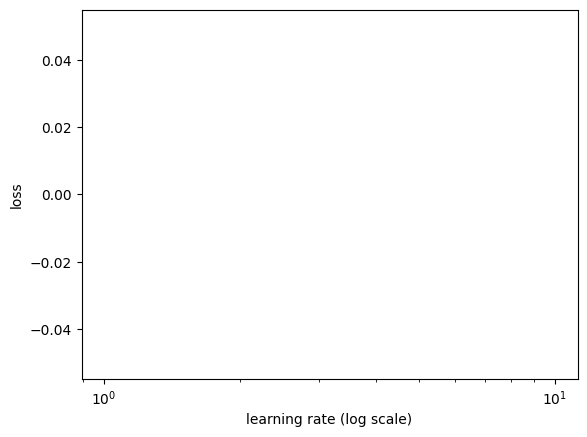

In [ ]:
learner.lr_find(show_plot=True, max_epochs=5)

In [ ]:
learner.autofit(lr=1e-4, # Learning Rate
                epochs=5, # Number of epochs to train the model
                early_stopping=2, # If the model does not improve after 2 epochs, we stop the training
                reduce_on_plateau=1,  # If the model does not improve aftear 1 epoch, we reduce the learning rate
                monitor='val_loss', # Metric to monitor the peformance of the model (loss computed on the validation dataset)
                checkpoint_folder='nlp_disaster/models/transformer_cpt_1' # After each epoch we store a checkpoint of the model
                )



begin training using triangular learning rate policy with max lr of 0.0001...
Epoch 1/5
1/1 [==============================] - 38s 38s/step - loss: 0.7147 - accuracy: 0.4211 - val_loss: 0.7393 - val_accuracy: 0.4286
Epoch 2/5
1/1 [==============================] - 3s 3s/step - loss: 0.6670 - accuracy: 0.6140 - val_loss: 0.7328 - val_accuracy: 0.4286
Epoch 3/5
1/1 [==============================] - 2s 2s/step - loss: 0.5925 - accuracy: 0.5439 - val_loss: 0.7129 - val_accuracy: 0.4286
Epoch 4/5
1/1 [==============================] - ETA: 0s - loss: 0.5592 - accuracy: 0.6140
Epoch 00004: Reducing Max LR on Plateau: new max lr will be 5e-05 (if not early_stopping).
1/1 [==============================] - 2s 2s/step - loss: 0.5592 - accuracy: 0.6140 - val_loss: 0.9700 - val_accuracy: 0.5714
Epoch 5/5
1/1 [==============================] - ETA: 0s - loss: 0.9157 - accuracy: 0.4561
Epoch 00005: Reducing Max LR on Plateau: new max lr will be 2.5e-05 (if not early_stopping).
Restoring model we

In [ ]:
class_names = ['Not Menu-Related', 'Menu-Related']
validation_report = learner.validate(val_data=val, class_names=class_names)
print("Validation Report:")
print(validation_report)

1/1 [==============================] - 5s 5s/step
                  precision    recall  f1-score   support

Not Menu-Related       0.40      0.67      0.50         3
    Menu-Related       0.50      0.25      0.33         4

        accuracy                           0.43         7
       macro avg       0.45      0.46      0.42         7
    weighted avg       0.46      0.43      0.40         7

Validation Report:
[[2 1]
 [3 1]]


#Zero shot with bart-large

In [ ]:
import pandas as pd
from transformers import pipeline
from tqdm.auto import tqdm

classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")

def classify_text(text):
    labels = ['Not Menu-Related', 'Menu-Related']
    result = classifier(text, labels)
    return result['labels'][0]

# progress bar
tqdm.pandas(desc="Classifying")

sample_df = data

sample_df['predicted_label'] = sample_df['text'].progress_apply(classify_text)
sample_df.head()


Classifying:   0%|          | 0/80 [00:00<?, ?it/s]

,text,target,predicted_label,actual_label,pred_label
0,What safety measures are in place for COVID-19?,0,Not Menu-Related,Not Menu-Related,Not Menu-Related
1,Do you have seasonal specials?,1,Menu-Related,Menu-Related,Menu-Related
2,Can you accommodate a peanut allergy?,1,Not Menu-Related,Menu-Related,Not Menu-Related
3,What is 2+2?,0,Not Menu-Related,Not Menu-Related,Not Menu-Related
4,Can I order through a delivery app?,0,Menu-Related,Not Menu-Related,Menu-Related


In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import pandas as pd

# Map the actual labels to the same format as the predicted labels
label_mapping = {0: 'Not Menu-Related', 1: 'Menu-Related'}
sample_df['actual_label'] = sample_df['target'].map(label_mapping)

# Calculate Accuracy
accuracy = accuracy_score(sample_df['actual_label'], sample_df['predicted_label'])
print(f"Accuracy: {accuracy:.4f}")

# Calculate Precision, Recall, and F1 Score
precision, recall, f1, _ = precision_recall_fscore_support(sample_df['actual_label'], sample_df['predicted_label'], average='binary', pos_label='Menu-Related')
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Accuracy: 0.6375
Precision: 0.5873
Recall: 0.9250
F1 Score: 0.7184


#Zero shot with deberta-large

In [ ]:
classifier = pipeline("zero-shot-classification", model="microsoft/deberta-large-mnli")

def classify_text(text):
    labels = ['Not Menu-Related', 'Menu-Related']
    result = classifier(text, labels)
    return result['labels'][0]

# progress bar
tqdm.pandas(desc="Classifying")

sample_df = data

sample_df['predicted_label'] = sample_df['text'].progress_apply(classify_text)
sample_df.head()


Classifying:   0%|          | 0/80 [00:00<?, ?it/s]

,text,target,predicted_label,actual_label,pred_label
0,What safety measures are in place for COVID-19?,0,Menu-Related,Not Menu-Related,Menu-Related
1,Do you have seasonal specials?,1,Menu-Related,Menu-Related,Menu-Related
2,Can you accommodate a peanut allergy?,1,Menu-Related,Menu-Related,Menu-Related
3,What is 2+2?,0,Not Menu-Related,Not Menu-Related,Not Menu-Related
4,Can I order through a delivery app?,0,Menu-Related,Not Menu-Related,Not Menu-Related


In [ ]:
# Map the actual labels to the same format as the predicted labels
label_mapping = {0: 'Not Menu-Related', 1: 'Menu-Related'}
sample_df['actual_label'] = sample_df['target'].map(label_mapping)

# Calculate Accuracy
accuracy = accuracy_score(sample_df['actual_label'], sample_df['predicted_label'])
print(f"Accuracy: {accuracy:.4f}")

# Calculate Precision, Recall, and F1 Score
precision, recall, f1, _ = precision_recall_fscore_support(sample_df['actual_label'], sample_df['predicted_label'], average='binary', pos_label='Menu-Related')
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Accuracy: 0.6750
Precision: 0.6061
Recall: 1.0000
F1 Score: 0.7547


In [ ]:
sample_df

,text,target,predicted_label,actual_label,pred_label
0,What safety measures are in place for COVID-19?,0,Menu-Related,Not Menu-Related,Menu-Related
1,Do you have seasonal specials?,1,Menu-Related,Menu-Related,Menu-Related
2,Can you accommodate a peanut allergy?,1,Menu-Related,Menu-Related,Menu-Related
3,What is 2+2?,0,Not Menu-Related,Not Menu-Related,Not Menu-Related
4,Can I order through a delivery app?,0,Menu-Related,Not Menu-Related,Not Menu-Related
...,...,...,...,...,...
75,Do you host private events?,0,Menu-Related,Not Menu-Related,Menu-Related
76,What safety measures are in place for COVID-19?,0,Menu-Related,Not Menu-Related,Menu-Related
77,Is your restaurant open on holidays?,0,Menu-Related,Not Menu-Related,Menu-Related
78,What is the most frequently ordered dish?,1,Menu-Related,Menu-Related,Not Menu-Related


#Zero shot with contextualized text

In [ ]:
classifier = pipeline("zero-shot-classification", model="microsoft/deberta-large-mnli")


def classify_text(text):
    labels = ['Not Menu-Related', 'Food Menu Related', 'Operational Related']
    # Add context to the text for better classification
    contextualized_text = f"Is the following question food or allergy related?. Question: '{text}'"
    result = classifier(contextualized_text, labels)
    return result['labels'][0]

# Wrap your pandas apply with tqdm for a progress bar
tqdm.pandas(desc="Classifying")

sample_df = data

# Apply the classifier to each row in the DataFrame
sample_df['predicted_label'] = sample_df['text'].progress_apply(classify_text)

# Display the first few rows of the DataFrame to verify
sample_df.head()


Classifying:   0%|          | 0/80 [00:00<?, ?it/s]

,text,target,predicted_label,actual_label,pred_label
0,What safety measures are in place for COVID-19?,0,Not Menu-Related,Not Menu-Related,Not Menu-Related
1,Do you have seasonal specials?,1,Food Menu Related,Menu-Related,Menu-Related
2,Can you accommodate a peanut allergy?,1,Not Menu-Related,Menu-Related,Not Menu-Related
3,What is 2+2?,0,Not Menu-Related,Not Menu-Related,Not Menu-Related
4,Can I order through a delivery app?,0,Food Menu Related,Not Menu-Related,Menu-Related


In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import pandas as pd

# Map your actual labels to the same format as your predicted labels, if necessary
label_mapping = {'Not Menu-Related': 'Not Menu-Related','Operational Related': 'Not Menu-Related', 'Food Menu Related': 'Menu-Related'}
sample_df['pred_label'] = sample_df['predicted_label'].map(label_mapping)

# Calculate Accuracy
accuracy = accuracy_score(sample_df['actual_label'], sample_df['pred_label'])
print(f"Accuracy: {accuracy:.4f}")

# Calculate Precision, Recall, and F1 Score
precision, recall, f1, _ = precision_recall_fscore_support(sample_df['actual_label'], sample_df['pred_label'], average='binary', pos_label='Menu-Related')
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Accuracy: 0.8125
Precision: 0.8049
Recall: 0.8250
F1 Score: 0.8148


In [ ]:
sample_df

,text,target,predicted_label,actual_label,pred_label
0,What safety measures are in place for COVID-19?,0,Not Menu-Related,Not Menu-Related,Not Menu-Related
1,Do you have seasonal specials?,1,Food Menu Related,Menu-Related,Menu-Related
2,Can you accommodate a peanut allergy?,1,Not Menu-Related,Menu-Related,Not Menu-Related
3,What is 2+2?,0,Not Menu-Related,Not Menu-Related,Not Menu-Related
4,Can I order through a delivery app?,0,Food Menu Related,Not Menu-Related,Menu-Related
...,...,...,...,...,...
75,Do you host private events?,0,Not Menu-Related,Not Menu-Related,Not Menu-Related
76,What safety measures are in place for COVID-19?,0,Not Menu-Related,Not Menu-Related,Not Menu-Related
77,Is your restaurant open on holidays?,0,Not Menu-Related,Not Menu-Related,Not Menu-Related
78,What is the most frequently ordered dish?,1,Food Menu Related,Menu-Related,Menu-Related
